# Final Project - CUNY DATA 604

### Simulation of Deliveries for Vincent's Pizzeria





## Introduction

Vincent's pizzeria is a popular local restaurant. During quarantine they have been very busy with deliveries. We would like to help them reduce the number of customers that are forced to wait. We can examine this with a simulation. 

More specifically, given a certain number of available delivery drivers and a particular customer demand for pizzas, we can simulate the number of customers waiting at any given minute. We use the modsim package in Python to run our simulations.

In [28]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

## Flow Chart

The structure of this model is quite simple. Delivery drivers can be in either one of two states:

__Available__ or __Busy__

There is some probability per minute that a pizza order will come in. When an order comes in, we check for availability, and an Available driver gets moved to Busy.

There is another probability per minute that a current delivery gets completed. When a delivery is completed, a Busy driver gets moved to Available.



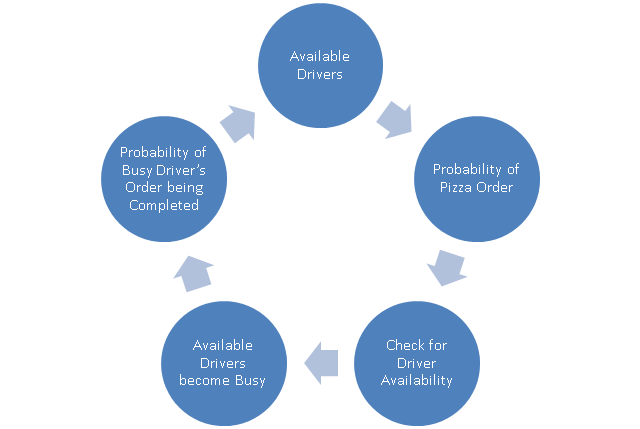

## Simulation

We start by defining all necessary functions:

In [29]:
def driver_to_busy(state):
    """Move one driver from Available to Busy.
    
    state: driver State object
    """
    if state.available_drivers == 0:
        state.waiting_customers += 1
        return
    state.available_drivers -= 1
    state.busy_drivers += 1
    
def driver_to_available(state):
    """Move one driver from Busy to Available.
    
    state: driver State object
    """
    if state.busy_drivers > 0:
        state.busy_drivers -= 1
        state.available_drivers += 1
        if state.waiting_customers > 0:
            state.waiting_customers -= 1
    
def step(state, order_prob, completion_prob):
    """Simulate one minute of time.
    
    state: driver State object
    order_prob: probability of a pizza order
    completion_prob: probability of a delivery completion
    """
    if flip(order_prob):
        driver_to_busy(state)
    
    if flip(completion_prob):
        driver_to_available(state)
    
    return state

def run_simulation(state, order_prob, completion_prob, num_steps):
    """Simulate the given number of time steps.
    
    state: driver State object
    order_prob: probability of a pizza order
    completion_prob: probability of a delivery completion
    num_steps: number of time steps
    """
    results = TimeFrame()
    for i in range(num_steps):
        results[i] = step(state, order_prob, completion_prob)
        
    return results

We can now start by running a simulation for the first hour of business given the following conditions:

There are __5__ total available drivers.
The order probability is __0.25__, i.e., 15 orders per hour on average.
The completion probability is __0.05__, i.e., 3 completions per hour or an average of 20 minutes per delivery.

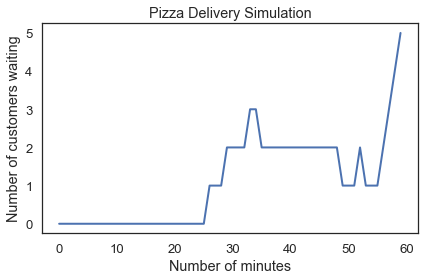

In [36]:
initial_state = State(available_drivers = 5, busy_drivers = 0, waiting_customers = 0)
order_prob = 0.25
completion_prob = 0.05
num_steps = 60

sim_results = run_simulation(initial_state, order_prob, completion_prob, num_steps)

plot(sim_results.loc['waiting_customers', :])

decorate(title='Pizza Delivery Simulation',
         xlabel='Number of minutes', 
         ylabel='Number of customers waiting')

Yikes, that's already a decent number of customers waiting just in the first hour. Let's try increasing the number of available drivers to 10.

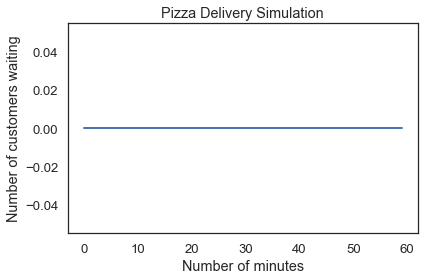

In [42]:
initial_state = State(available_drivers = 10, busy_drivers = 0, waiting_customers = 0)
order_prob = 0.25
completion_prob = 0.05
num_steps = 60

sim_results = run_simulation(initial_state, order_prob, completion_prob, num_steps)

plot(sim_results.loc['waiting_customers', :])

decorate(title='Pizza Delivery Simulation',
         xlabel='Number of minutes', 
         ylabel='Number of customers waiting')

That looks a lot better. But remember, this is just the first hour of business. Vincent's is open nightly from 5pm to 11pm. What happens if we simulate all six hours?

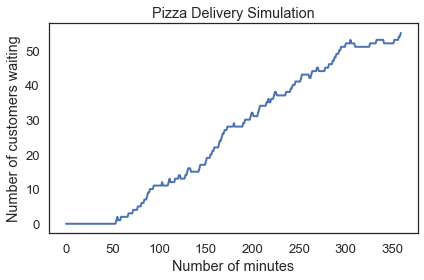

In [52]:
initial_state = State(available_drivers = 10, busy_drivers = 0, waiting_customers = 0)
order_prob = 0.25
completion_prob = 0.05
num_steps = 360

sim_results = run_simulation(initial_state, order_prob, completion_prob, num_steps)

plot(sim_results.loc['waiting_customers', :])

decorate(title='Pizza Delivery Simulation',
         xlabel='Number of minutes', 
         ylabel='Number of customers waiting')

Wow. That is an exorbitant number of customers waiting. What can we do?

## Model verification and validity

We can (and did) easily verify that our model is producing similar results from simulation to simulation. However, the validity of the model, i.e., its conceptual resemblance to real life, could be of concern.

For example, how many drivers would we need with the current demand and completion rates to achieve a reasonable number of waiting customers?

Below is a simulation with __60__ drivers:

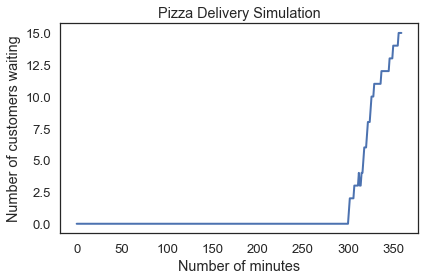

In [53]:
initial_state = State(available_drivers = 60, busy_drivers = 0, waiting_customers = 0)
order_prob = 0.25
completion_prob = 0.05
num_steps = 360

sim_results = run_simulation(initial_state, order_prob, completion_prob, num_steps)

plot(sim_results.loc['waiting_customers', :])

decorate(title='Pizza Delivery Simulation',
         xlabel='Number of minutes', 
         ylabel='Number of customers waiting')

These waits are more reasonable, but the number of drivers is clearly unreasonable.

## Conclusions / Future Work

We have seen and verified that we are able to create and run a simulation of number of customers waiting for pizza delivery from Vincent's Pizzeria based on the number of drivers available, the customer demand probability, and the delivery completion rate.

The number of drivers needed to achieve a reasonable number of waiting customers is simply not realistic using our given assumptions.

Things we can do to improve the model in the future to both make it more realistic as well as get a better estimate of needed drivers:

* Build in assumptions for drivers being able to deliver more than one order at a time. E.g., if two addresses for current orders are relatively nearby, it does not make sense to have two drivers deliver those orders separately. One driver could deliver each of them on the same trip.

* Create flexible demand probabilities based on time of day. I.e., it is unlikely that pizza demand is constant from 5pm to 11pm. More likely demand starts slow, ramps up, and then calms down. It would not be hard to adjust the demand probability by hour (or even by minute) to reflect this.